In [1]:
import netCDF4 as nc
import pandas as pd
from netCDF4 import Dataset
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
#tf.random.set_seed(7)
tf.random.set_seed(77)

In [2]:
nc_f    = './icecon.APPX.Bering_Strait.nc'
#nc_f    = './icecon.APPX.90N.135W.nc'
nc_fid  = Dataset(nc_f, 'r')
time    = nc_fid.variables['record'][:]

In [3]:
sic    = nc_fid.variables['icecon'][:,0,0]

In [4]:
split = int(0.8 * len(sic))
sic_train  = sic[: split - 1]
sic_test   = sic[split:]
time_train = time[: split - 1]
time_test  = time[split:]

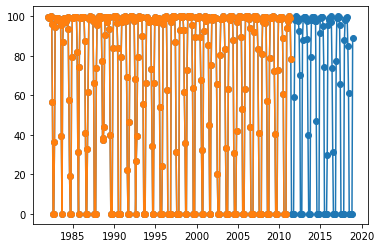

In [5]:
plt.plot(time,sic,'-o')
plt.plot(time_train,sic_train,'-o')

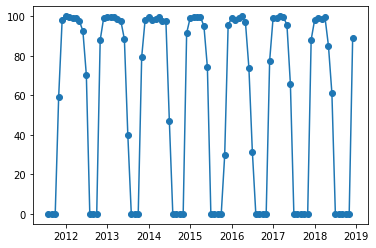

In [6]:
plt.plot(time_test,sic_test,'-o')

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return array(X), array(y)

In [8]:
n_steps = 12
X,y = split_sequence(sic,n_steps)
print(X.shape)
print(y.shape)
print(X[0:5,:])

(432, 12)
(432,)
[[ 99.6  99.3  99.2  99.8 100.   96.2  56.8   0.    0.   36.3  94.7  99.3]
 [ 99.3  99.2  99.8 100.   96.2  56.8   0.    0.   36.3  94.7  99.3  98.7]
 [ 99.2  99.8 100.   96.2  56.8   0.    0.   36.3  94.7  99.3  98.7  98.3]
 [ 99.8 100.   96.2  56.8   0.    0.   36.3  94.7  99.3  98.7  98.3  99.1]
 [100.   96.2  56.8   0.    0.   36.3  94.7  99.3  98.7  98.3  99.1  98.8]]


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[0:5,:])

[[ 0.7835263   0.77645147  0.7740664   0.78851914  0.79336095  0.7032374
  -0.24216641 -1.6006358  -1.6006358  -0.7299935   0.6711515   0.78458065]
 [ 0.7763185   0.7740485   0.7884835   0.7933248   0.70205027 -0.24399196
  -1.608468   -1.6006358  -0.7299935   0.6707092   0.781223    0.77025783]
 [ 0.77391565  0.7884655   0.79328907  0.70201576 -0.24469641 -1.6095409
  -1.608468   -0.7299935   0.6707092   0.7810387   0.76686573  0.7607096 ]
 [ 0.78833175  0.79327106  0.7019815  -0.24471438 -1.6095494  -1.6095409
  -0.7352858   0.6707092   0.7810387   0.7666477   0.7572944   0.7798063 ]
 [ 0.79313695  0.7019643  -0.24473245 -1.6095437  -1.6095494  -0.7368398
   0.6695031   0.7810387   0.7666477   0.75705403  0.77643716  0.7726451 ]]


In [10]:
split = int(0.8 * len(X))
X_train = X[: split - 1]
X_test = X[split:]

y_train = y[: split - 1]
y_test = y[split:]

print(X_train.shape)
print(X_test.shape)

(344, 12)
(87, 12)


In [11]:
def basic_MLP(n_steps=36):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=n_steps))
    model.add(Dropout(0.3))
    model.add(Dense(100))
    model.add(Dropout(0.3))
    model.add(Dense(100))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [12]:
mlp_model = basic_MLP(n_steps)

In [13]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [14]:
mlp_history = mlp_model.fit(X_train ,y_train, epochs=400, shuffle=False, batch_size=8, verbose=1)

Epoch 1/400
43/43 [==============================] - 0s 838us/step - loss: 4584.4980
Epoch 2/400
43/43 [==============================] - 0s 743us/step - loss: 685.5759
Epoch 3/400
43/43 [==============================] - 0s 784us/step - loss: 486.0175
Epoch 4/400
43/43 [==============================] - 0s 641us/step - loss: 377.7878
Epoch 5/400
43/43 [==============================] - 0s 656us/step - loss: 389.9833
Epoch 6/400
43/43 [==============================] - 0s 678us/step - loss: 385.9647
Epoch 7/400
43/43 [==============================] - 0s 679us/step - loss: 348.4633
Epoch 8/400
43/43 [==============================] - 0s 672us/step - loss: 339.8075
Epoch 9/400
43/43 [==============================] - 0s 653us/step - loss: 375.9588
Epoch 10/400
43/43 [==============================] - 0s 700us/step - loss: 351.9328
Epoch 11/400
43/43 [==============================] - 0s 652us/step - loss: 337.4229
Epoch 12/400
43/43 [==============================] - 0s 669us/step - los

43/43 [==============================] - 0s 672us/step - loss: 240.9151
Epoch 193/400
43/43 [==============================] - 0s 673us/step - loss: 237.9595
Epoch 194/400
43/43 [==============================] - 0s 618us/step - loss: 270.6215
Epoch 195/400
43/43 [==============================] - 0s 639us/step - loss: 232.1001
Epoch 196/400
43/43 [==============================] - 0s 607us/step - loss: 246.7618
Epoch 197/400
43/43 [==============================] - 0s 616us/step - loss: 237.3307
Epoch 198/400
43/43 [==============================] - 0s 616us/step - loss: 244.3364
Epoch 199/400
43/43 [==============================] - 0s 623us/step - loss: 261.2935
Epoch 200/400
43/43 [==============================] - 0s 612us/step - loss: 242.2231
Epoch 201/400
43/43 [==============================] - 0s 628us/step - loss: 263.9517
Epoch 202/400
43/43 [==============================] - 0s 631us/step - loss: 241.5224
Epoch 203/400
43/43 [==============================] - 0s 620us/step

43/43 [==============================] - 0s 679us/step - loss: 241.2971
Epoch 383/400
43/43 [==============================] - 0s 638us/step - loss: 258.7253
Epoch 384/400
43/43 [==============================] - 0s 612us/step - loss: 243.0770
Epoch 385/400
43/43 [==============================] - 0s 609us/step - loss: 228.0697
Epoch 386/400
43/43 [==============================] - 0s 757us/step - loss: 238.9883
Epoch 387/400
43/43 [==============================] - 0s 702us/step - loss: 261.1487
Epoch 388/400
43/43 [==============================] - 0s 655us/step - loss: 225.9548
Epoch 389/400
43/43 [==============================] - 0s 698us/step - loss: 231.3246
Epoch 390/400
43/43 [==============================] - 0s 625us/step - loss: 224.9317
Epoch 391/400
43/43 [==============================] - 0s 694us/step - loss: 239.2448
Epoch 392/400
43/43 [==============================] - 0s 750us/step - loss: 233.3542
Epoch 393/400
43/43 [==============================] - 0s 634us/step

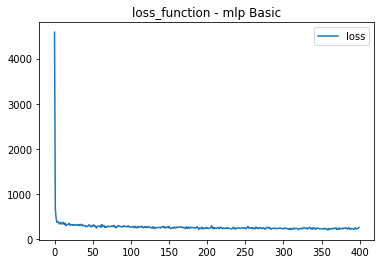

In [15]:
plt.plot(mlp_history.history["loss"])
plt.title("loss_function - mlp Basic")
plt.legend(["loss"])
plt.show()

In [30]:
h = mlp_model.evaluate(X_test, y_test, verbose=0)

In [32]:
from sklearn.metrics import r2_score
predictions = mlp_model.predict(X_test)
test_r2 = r2_score(y_test, predictions)

RMSE with MLP method =  12.49587761613649
CORR with MLP method =  0.9210557461636183


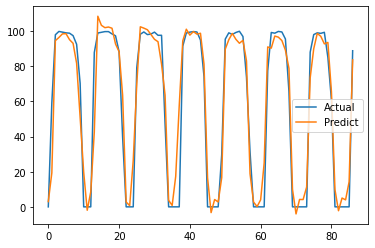

In [33]:
mlp_acc_df = pd.DataFrame()
mlp_acc_df['Actual'] = y_test
mlp_acc_df['Predict'] = predictions
mlp_acc_df.plot()
print('RMSE with MLP method = ', h**0.5)
print('CORR with MLP method = ', test_r2)

In [40]:
# Dumb model: SIC from previous year
prev_val = y_test[0]
sse = 0

for n in range(12, len(y_test)-1):
    err = y_test[n] - prev_val
    sq_err = err ** 2
    sse = sse + sq_err
    prev_val = y_test[n-11]

mse = sse / n
#mse**0.5

In [41]:
# Dumb model: SIC from previous year
predict = pd.DataFrame(y_test, columns = ["dumb_predict"])
predict = predict.shift(12)
predict["actual"] = y_test
predict.fillna(value=0, inplace=True)
correct_cols = ["actual", "dumb_predict"]
predict = predict.reindex(columns=correct_cols)
#predict[12:]

In [42]:
from sklearn.metrics import r2_score
predictions = predict["dumb_predict"].values
test_r2 = r2_score(y_test[12:], predictions[12:])
#test_r2 = r2_score(y_test, predictions)

RMSE with SIC from Last Year =  13.507366467009208
CORR with SIC from Last Year =  0.8971819207731234


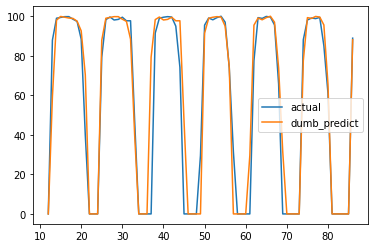

In [43]:
predict[12:].plot()
print('RMSE with SIC from Last Year = ', mse**0.5)
print('CORR with SIC from Last Year = ', test_r2)